<a href="https://colab.research.google.com/github/emillyedu/Churn-analise-de-dados/blob/main/Petlove_an%C3%A1lise_do_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [5]:
#leitura do csv
df = pd.read_csv('/content/data-test-analytics (6).csv')

In [30]:
#conversão das colunas para datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%m/%d/%y %I:%M %p')
df['updated_at'] = pd.to_datetime(df['updated_at'], format='%m/%d/%y %I:%M %p')
df['deleted_at'] = pd.to_datetime(df['deleted_at'], format='%m/%d/%y %I:%M %p')
df['last_date_purchase'] = pd.to_datetime(df['last_date_purchase'], format='%m/%d/%y %I:%M %p')

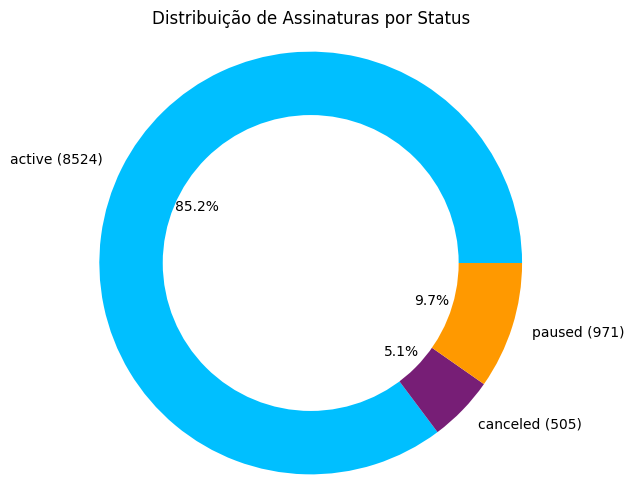

In [31]:
"""Disttribuição de assinaturas por status

Descrição:
  Calculos e criação de gráfico de rosca sobre a distribiuição
  da qunantidades de assinaturas distintas por status.
"""

count_id_per_status = df.groupby('status')['id'].nunique()
total_distinct_ids = df['id'].nunique()
perc_per_status = (count_id_per_status / total_distinct_ids) * 100

#label para incluir status e personalidade
labels = [f'{status} ({count})' for status, count in zip(count_id_per_status.index, count_id_per_status)]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(perc_per_status, labels=labels, autopct='%1.1f%%', colors=['#00BFFF', '#771e76', '#FF9900'])
ax.set_title('Distribuição de Assinaturas por Status')
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig.gca().add_artist(center_circle)
ax.axis('equal')

plt.show()


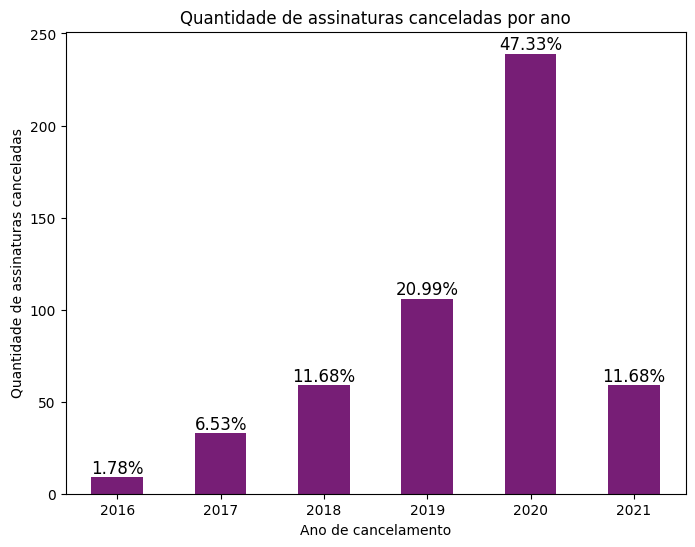

In [32]:
"""Quantidade de assinaturas canceladas por ano

Descrição:
  Calculos e criação de gráfico de barras para a visualização
  da quantidade de assinaturas distintas canceladas, por ano.
"""

df['year_deleted_at'] = df['deleted_at'].dt.year
count_id_per_year = df.groupby('year_deleted_at')['id'].nunique()

total_canceled_ids = df['deleted_at'].count()
perc_per_year = (count_id_per_year / total_canceled_ids) * 100

count_id_per_year.index = count_id_per_year.index.astype(int)
count_id_per_year = count_id_per_year.sort_index()

plt.figure(figsize=(8, 6))
ax = count_id_per_year.plot(kind='bar', color='#771e76')

for i, v in enumerate(perc_per_year):
    ax.text(i, count_id_per_year.iloc[i], f'{v:.2f}%', ha='center', va='bottom', fontsize=12)

plt.ylabel('Quantidade de assinaturas canceladas')
plt.xlabel('Ano de cancelamento')
plt.title('Quantidade de assinaturas canceladas por ano')
plt.xticks(rotation=0)

plt.show()


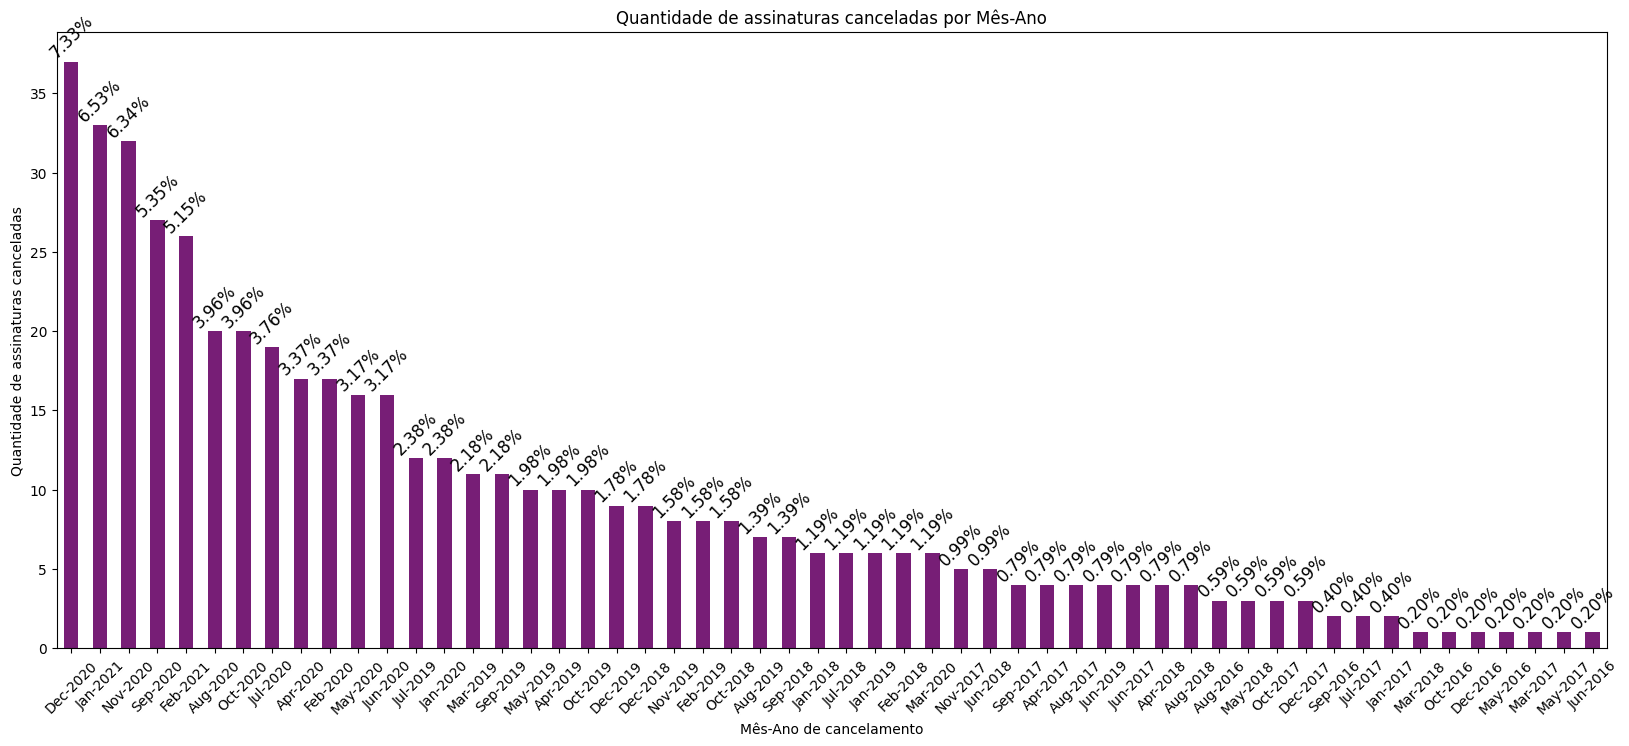

In [33]:
"""Quantidade de assinaturas canceladas por Mês-Ano

Descrição:
  Calculos e criação de gráfico de barras para a visualização
  da quantidade de assinaturas distintas canceladas, por Mês-Ano,
  em ordem decrescente.
"""

df['month_deleted_at'] = df['deleted_at'].dt.strftime('%b-%Y')
count_ids_per_month_year =  df.groupby('month_deleted_at')['id'].nunique()

total_canceled_id = df['deleted_at'].count()
perc_month_year = (count_ids_per_month_year / total_canceled_id) * 100

count_ids_per_month_year = count_ids_per_month_year.sort_values(ascending=False)
perc_month_year = perc_month_year.sort_values(ascending=False)

plt.figure(figsize=(20, 8))
ax = count_ids_per_month_year.plot(kind='bar', color='#771e76')

for i, v in enumerate(perc_month_year):
    ax.text(i, count_ids_per_month_year.iloc[i], f'{v:.2f}%', ha='center', va='bottom', fontsize=12, rotation=45)

plt.ylabel('Quantidade de assinaturas canceladas')
plt.xlabel('Mês-Ano de cancelamento')
plt.title('Quantidade de assinaturas canceladas por Mês-Ano')


plt.xticks(rotation=45)
plt.show()


<ipython-input-34-3824205071b6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['month_deleted_at'] = df_2020['deleted_at'].dt.strftime('%b-%Y')


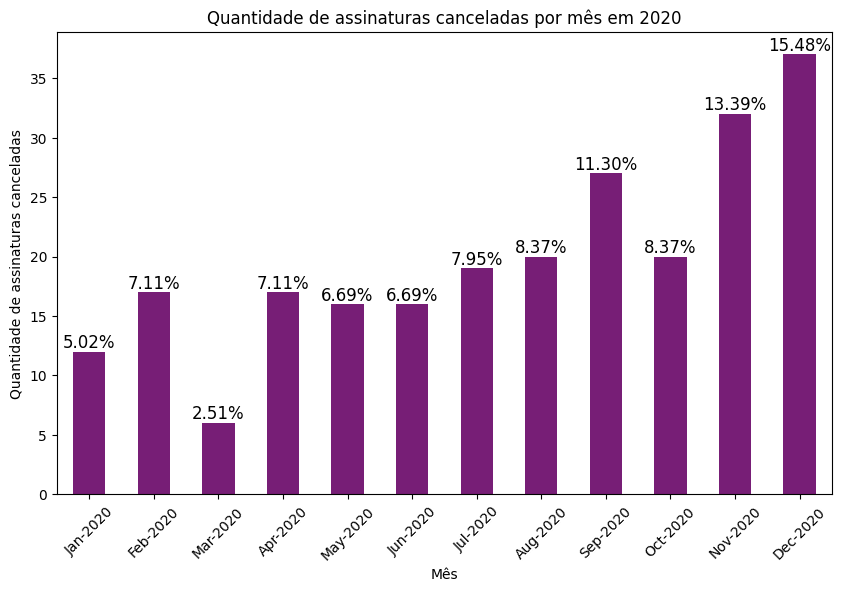

In [34]:
"""Quantidade de assinaturas canceladas por mês em 2020

Descrição:
  Análise feita do mês de 2020, o qual apresentou maior índice de cancelamento.
  Calculos e criação de gráfico de barras para a visualização da quantidade de
  assinaturas distintas canceladas, por mês em 2020.
"""


df_2020 = df[df['deleted_at'].dt.year == 2020]
df_2020['month_deleted_at'] = df_2020['deleted_at'].dt.strftime('%b-%Y')
count_id_2020 = df_2020.groupby('month_deleted_at')['id'].nunique()

total_canceled_id_2020 = df_2020['deleted_at'].count()
perc_2020 = (count_id_2020 / total_canceled_id_2020) * 100

months_ord = [
    'Jan-2020', 'Feb-2020', 'Mar-2020', 'Apr-2020', 'May-2020', 'Jun-2020',
    'Jul-2020', 'Aug-2020', 'Sep-2020', 'Oct-2020', 'Nov-2020', 'Dec-2020'
]
count_id_2020 = count_id_2020.reindex(months_ord)
perc_2020 = perc_2020.reindex(months_ord)

plt.figure(figsize=(10, 6))
ax = count_id_2020.plot(kind='bar', color='#771e76')

for i, v in enumerate(perc_2020):
    ax.text(i, count_id_2020.iloc[i], f'{v:.2f}%', ha='center', va='bottom', fontsize=12)

plt.ylabel('Quantidade de assinaturas canceladas')
plt.xlabel('Mês')
plt.title('Quantidade de assinaturas canceladas por mês em 2020')

plt.xticks(rotation=45)
plt.show()


In [35]:
#Criação do df_canceled que filtra pelos dados com status 'canceled'
df_canceled = df[df['status'] == 'canceled']

<ipython-input-36-fc4f580e1006>:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(maps.geometry.centroid.x, maps.geometry.centroid.y, maps['SIGLA_UF']):


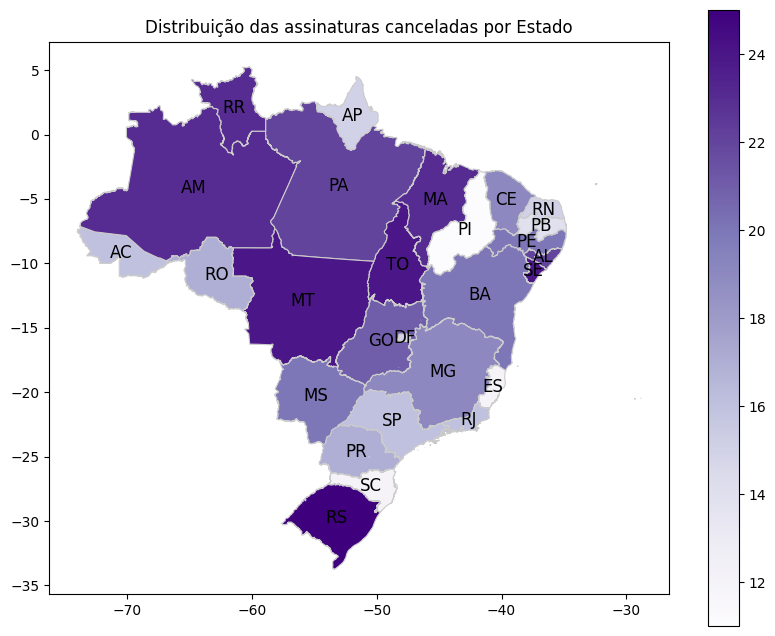

In [36]:
"""Distribuição das assinaturas canceladas por Estado

Descrição:
  Criação de mapa com todos os estados do Brasil, afim de conhecer
  a distribuição das assinaturas canceladas, por Estado.
"""

count_id_states = df_canceled.groupby('state')['id'].nunique().reset_index()

shapefile = '/content/maps/BR_UF_2022.shp'
maps = gpd.read_file(shapefile)
maps = maps.merge(count_id_states, left_on='SIGLA_UF', right_on='state', how='left')

#Preencher valores nulos com 0 (estados sem cancelamentos)
maps['id'].fillna(0, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
maps.plot(column='id', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Distribuição das assinaturas canceladas por Estado')

for x, y, label in zip(maps.geometry.centroid.x, maps.geometry.centroid.y, maps['SIGLA_UF']):
    ax.text(x, y, label, fontsize=12, ha='center', va='center')

plt.show()

<ipython-input-37-8fedab61dd5e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceled['diff_created_deleted_at'] = (df_canceled['deleted_at'] - df_canceled['created_at']).dt.days//30


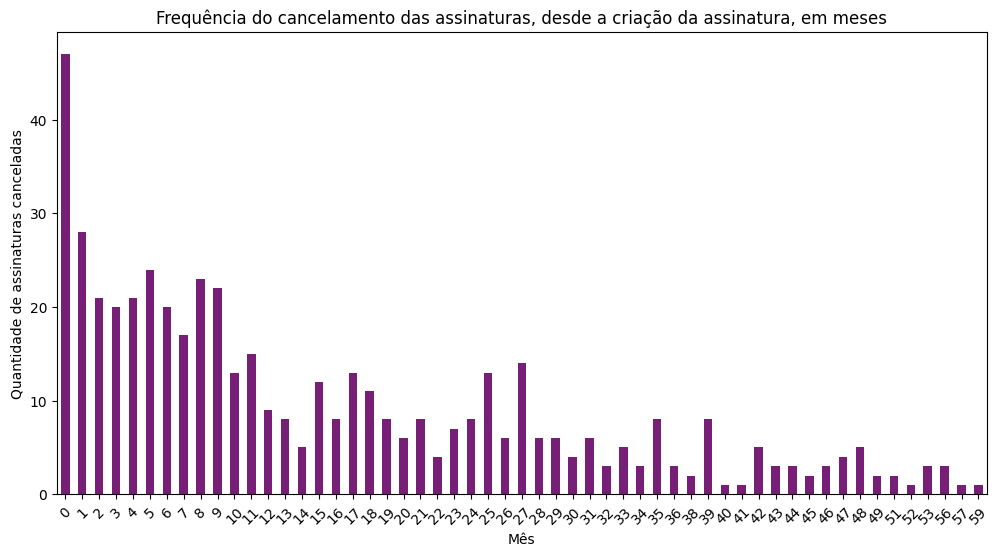

In [37]:
"""Frequência do cancelamento das assinaturas, desde a criação da assinatura, em meses

Descrição:
  calculo da diferença entre o dia do cancelamento e o dia da criação da assinatura e
  criação de gráfico de barras para observar a frequência do cancelamento das assinaturas,
  desde a criação, em meses.
Objetivo:
  Responder a pergunta 'Com que frequência, desde a criação da assinatura, se tem o cancelamento?'
"""

df_canceled['diff_created_deleted_at'] = (df_canceled['deleted_at'] - df_canceled['created_at']).dt.days//30
count_per_diff = df_canceled.groupby('diff_created_deleted_at')['id'].nunique()
count_per_diff.sort_values()

plt.figure(figsize=(12, 6))
ax = count_per_diff.plot(kind='bar', color='#771e76')

plt.ylabel('Quantidade de assinaturas canceladas')
plt.xlabel('Mês')
plt.title('Frequência do cancelamento das assinaturas, desde a criação da assinatura, em meses')

plt.xticks(rotation=45)
plt.show()

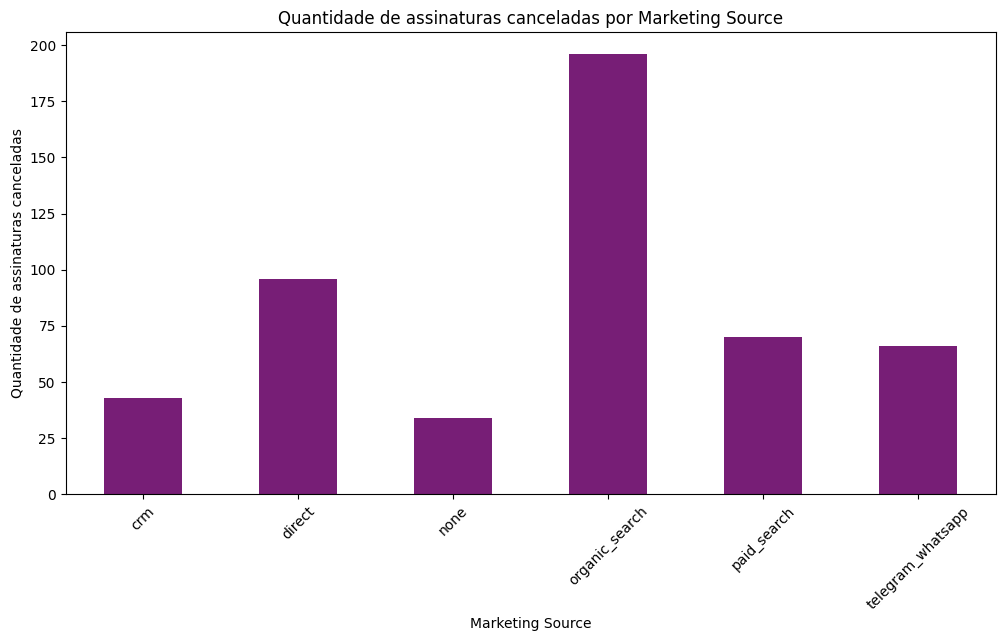

In [38]:
"""Quantidade de assinaturas canceladas por Marketing Source

Descrição:
  Distribuição da quantidade de assinaturas canceladas, por marketing source
"""
# Agrupe os dados por "marketing_source" e conte IDs únicos
count_per_marketing_source = df_canceled.groupby('marketing_source')['id'].nunique()

plt.figure(figsize=(12, 6))
ax = count_per_marketing_source.plot(kind='bar', color='#771e76')

plt.xlabel('Marketing Source')
plt.ylabel('Quantidade de assinaturas canceladas')
plt.title('Quantidade de assinaturas canceladas por Marketing Source')
plt.xticks(rotation=45)

plt.show()


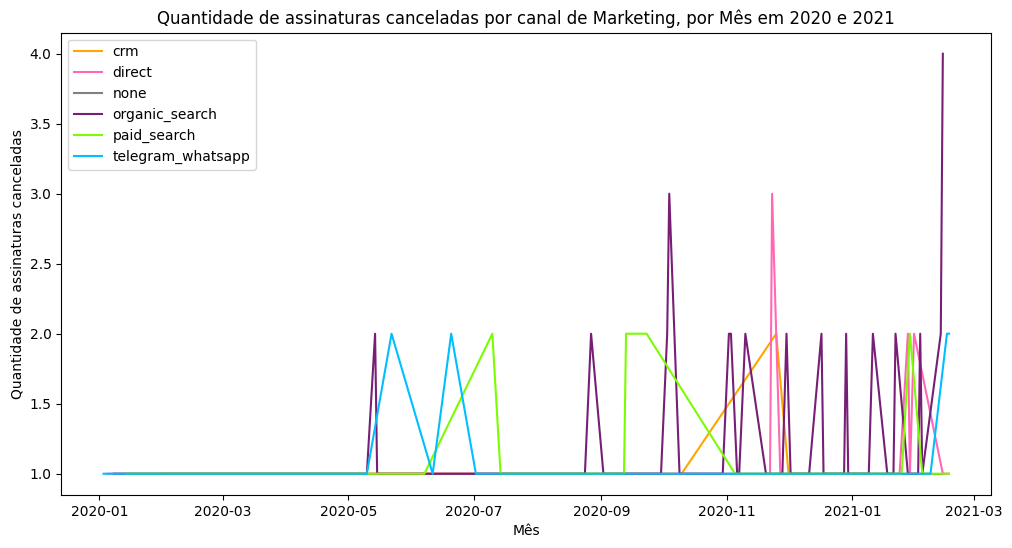

In [39]:
"""Quantidade de assinaturas canceladas por Marketing Source, por Mês em 2020 e 2021

Descrição:
  Distribuição da quantidade de assinaturas canceladas, por marketing source,
  por Mês em 2020 e 2021, visto que são os mês-anos que ocorreram picos de cancelamentos.
"""

df_canceled_2020_2021 = df_canceled[(df_canceled['deleted_at'].dt.year == 2020) | (df_canceled['deleted_at'].dt.year == 2021)]
df_canceled_per_mkt = df_canceled_2020_2021.groupby(['marketing_source', df_canceled_2020_2021['deleted_at'].dt.date])['id'].nunique().reset_index()

cores = {
    'organic_search': '#771e76',
    'crm': '#FFA500',
    'direct': '#FF69B4',
    'paid_search': '#7CFC00',
    'telegram_whatsapp' : '#00BFFF',
    'none': 'gray'
}

plt.figure(figsize=(12, 6))

for source in df_canceled_per_mkt['marketing_source'].unique():
    data_source = df_canceled_per_mkt[df_canceled_per_mkt['marketing_source'] == source]
    plt.plot(data_source['deleted_at'], data_source['id'], label=source, color=cores.get(source))

plt.xlabel('Mês')
plt.ylabel('Quantidade de assinaturas canceladas')
plt.title('Quantidade de assinaturas canceladas por canal de Marketing, por Mês em 2020 e 2021')
plt.legend()

plt.show()


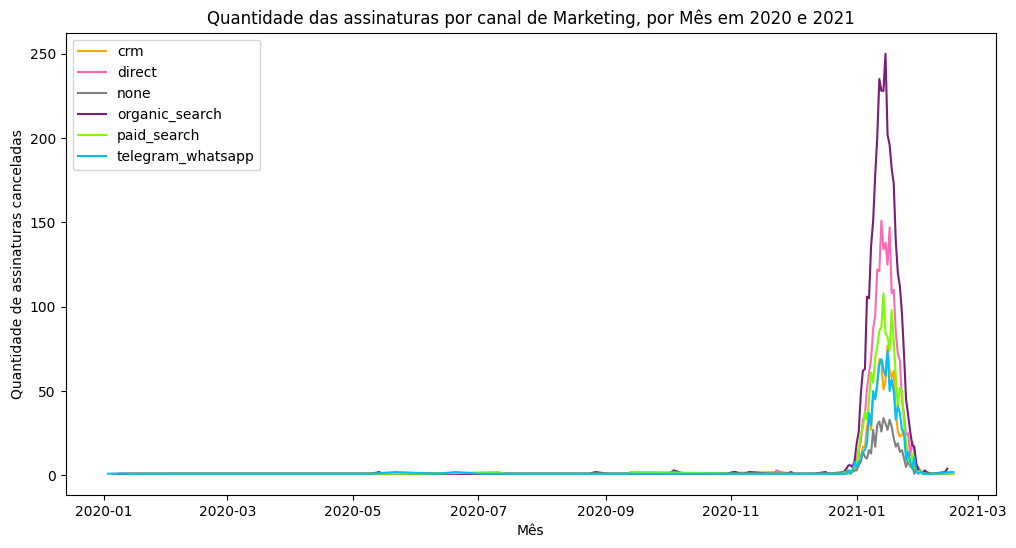

In [40]:
"""Quantidade das assinaturas por Marketing Source, por Mês em 2020 e 2021

Descrição:
  Distribuição da quantidade de assinaturas, por marketing source,
  por Mês em 2020 e 2021.
"""

df_canceled_2020_2021 = df[(df['updated_at'].dt.year == 2020) | (df['updated_at'].dt.year == 2021)]
df_canceled_per_mkt = df_canceled_2020_2021.groupby(['marketing_source', df_canceled_2020_2021['updated_at'].dt.date])['id'].nunique().reset_index()

cores = {
    'organic_search': '#771e76',
    'crm': '#FFA500',
    'direct': '#FF69B4',
    'paid_search': '#7CFC00',
    'telegram_whatsapp' : '#00BFFF',
    'none': 'gray',
}

plt.figure(figsize=(12, 6))

for source in df_canceled_per_mkt['marketing_source'].unique():
    data_source = df_canceled_per_mkt[df_canceled_per_mkt['marketing_source'] == source]
    plt.plot(data_source['updated_at'], data_source['id'], label=source, color=cores.get(source))

plt.xlabel('Mês')
plt.ylabel('Quantidade de assinaturas canceladas')
plt.title('Quantidade das assinaturas por canal de Marketing, por Mês em 2020 e 2021')
plt.legend()

plt.show()

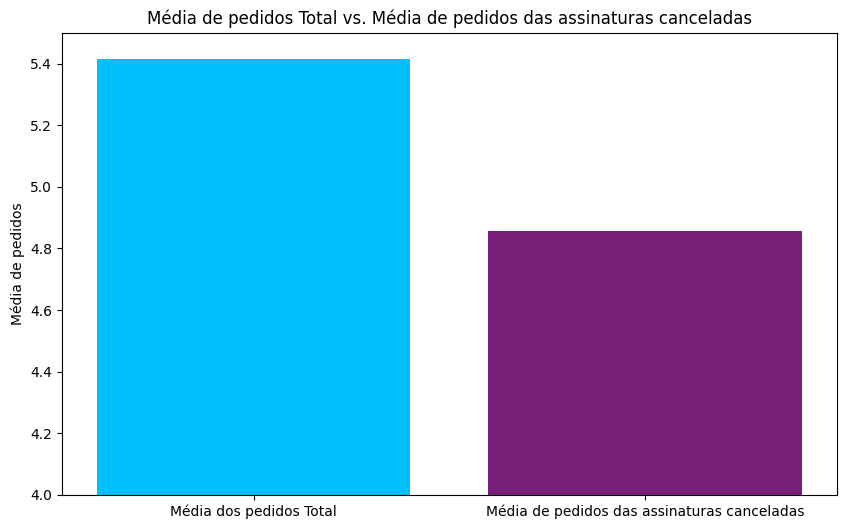

In [41]:
"""Média de pedidos Total vs. Média de pedidos das assinaturas canceladas

Descrição:
  Diferença das médias entre o total de pedidos e pedidos das assinaturas canceladas.

Objetivo:
  Entender se há diferença considerável.
"""

mean_all_orders = df['all_orders'].mean()
mean_all_orders_canceled = df_canceled['all_orders'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Média dos pedidos Total', 'Média de pedidos das assinaturas canceladas'], [mean_all_orders, mean_all_orders_canceled], color=['#00BFFF', '#771e76'])
plt.ylabel('Média de pedidos')
plt.title('Média de pedidos Total vs. Média de pedidos das assinaturas canceladas')
plt.ylim(4, 5.5)

plt.show()

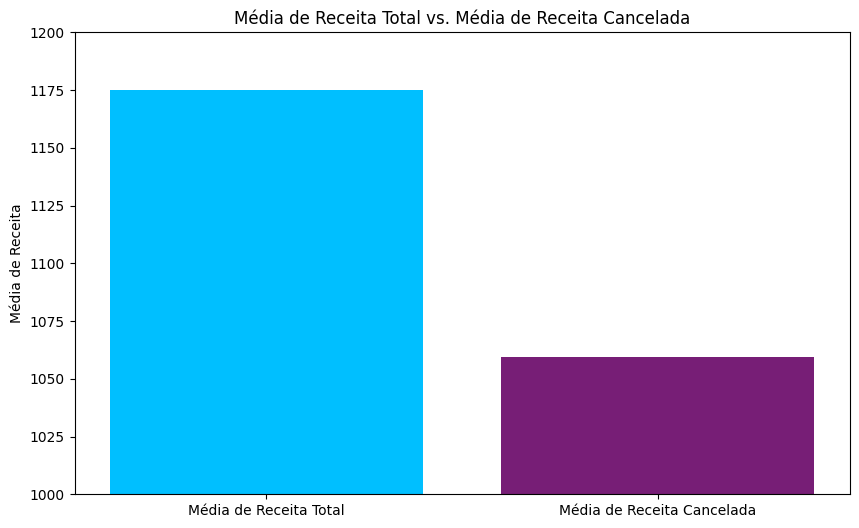

In [42]:
"""Média da receita Total vs. Média da receita das assinaturas canceladas

Descrição:
  Diferença das médias entre o total da receita e receita das assinaturas canceladas.

Objetivo:
  Entender se há diferença considerável.
"""
mean_all_revenue = df['all_revenue'].mean()
mean_all_revenue_canceled = df_canceled['all_revenue'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Média de Receita Total', 'Média de Receita Cancelada'], [mean_all_revenue, mean_all_revenue_canceled], color=['#00BFFF', '#771e76'])
plt.ylabel('Média de Receita')
plt.title('Média de Receita Total vs. Média de Receita Cancelada')
plt.ylim(1000, 1200)

plt.show()


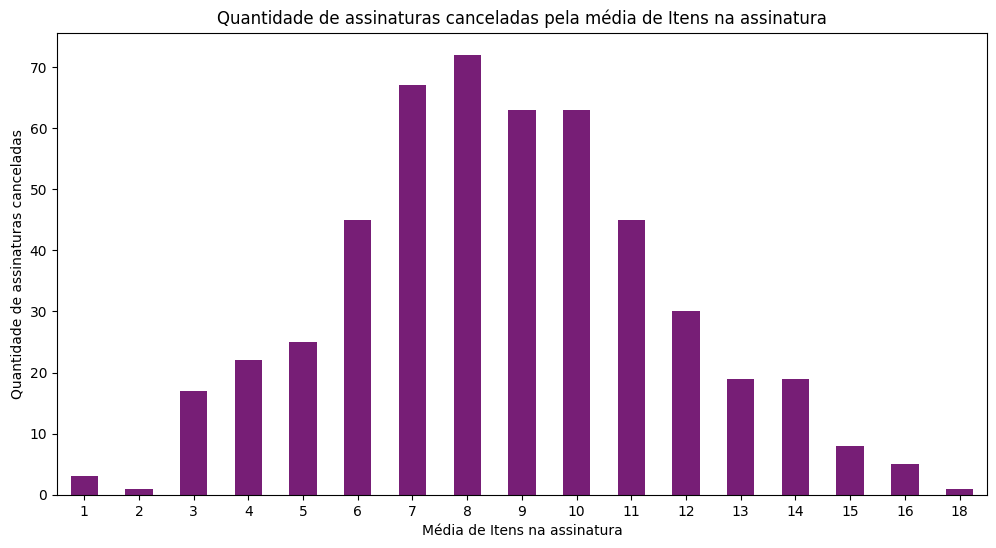

In [43]:
"""Quantidade de assinaturas canceladas pela média de Itens na assinatura

Descrição:
  Criar gráfico que apresente a distribuição da quantidade de assinaturas
  canceladas pela média de Itens na assinatura.
"""

count_per_items_quantity = df_canceled.groupby('items_quantity')['id'].count()

plt.figure(figsize=(12, 6))
count_per_items_quantity.plot(kind='bar', color='#771e76')

plt.xlabel('Média de Itens na assinatura')
plt.ylabel('Quantidade de assinaturas canceladas')
plt.title('Quantidade de assinaturas canceladas pela média de Itens na assinatura')
plt.xticks(rotation=0)

plt.show()


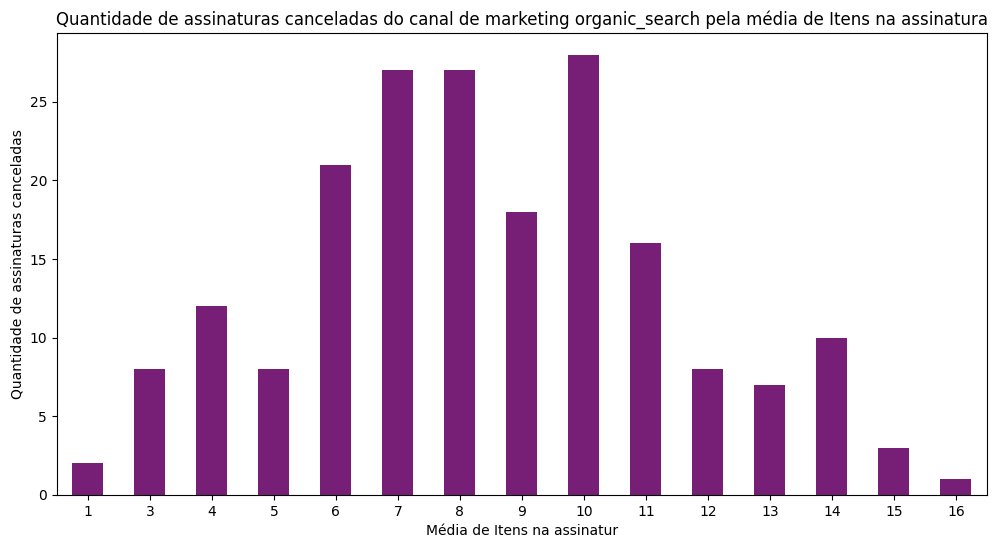

In [44]:
"""Quantidade de assinaturas canceladas pela média de Itens na assinatura, considerando
apenas o canal de marketing organic_search

Descrição:
  Criar gráfico que apresente a distribuição da quantidade de assinaturas
  canceladas pela média de Itens na assinatura, considerando apenas o canal
  de marketing organic_search.
"""

df_canceled_mkt_i = df[(df['status'] == 'canceled') & (df['marketing_source'] == 'organic_search')]
count_per_items_quantity = df_canceled_mkt_i.groupby('items_quantity')['id'].count()

plt.figure(figsize=(12, 6))
count_per_items_quantity.plot(kind='bar', color='#771e76')
plt.xlabel('Média de Itens na assinatur')
plt.ylabel('Quantidade de assinaturas canceladas')
plt.title('Quantidade de assinaturas canceladas do canal de marketing organic_search pela média de Itens na assinatura')
plt.xticks(rotation=0)

plt.show()


In [45]:
#rotulando intervalos da Média de gasto por pedido e criando coluna para categorizar os intervalos
num_slots = 5

min_ticket = df['average_ticket'].min()
max_ticket = df['average_ticket'].max()
slots = np.linspace(min_ticket, max_ticket, num=num_slots+1)

label_slots = [f'{slots[i]:.1f}-{slots[i+1]:.1f}' for i in range(num_slots)]

df['slots_average_ticket'] = pd.cut(df['average_ticket'], bins=slots, labels=label_slots)

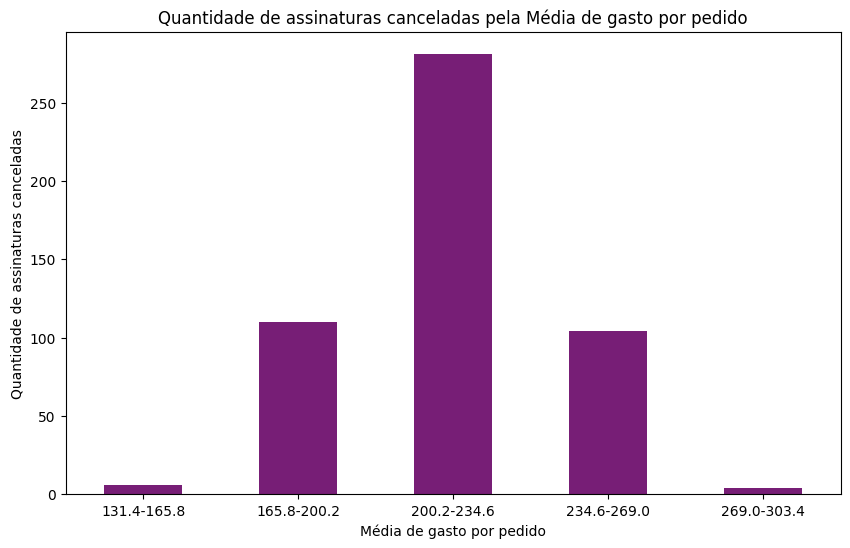

In [46]:
"""Quantidade de assinaturas canceladas pela Média de gasto por pedido

Descrição:
  Criar gráfico que apresente a distribuição da quantidade de assinaturas
  canceladas pela Média de gasto por pedido.
"""

df_canceled = df[df['status'] == 'canceled']
count_per_slots = df_canceled['slots_average_ticket'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
count_per_slots.plot(kind='bar', color='#771e76')
plt.xlabel('Média de gasto por pedido')
plt.ylabel('Quantidade de assinaturas canceladas')
plt.title('Quantidade de assinaturas canceladas pela Média de gasto por pedido')
plt.xticks(rotation=0)

plt.show()

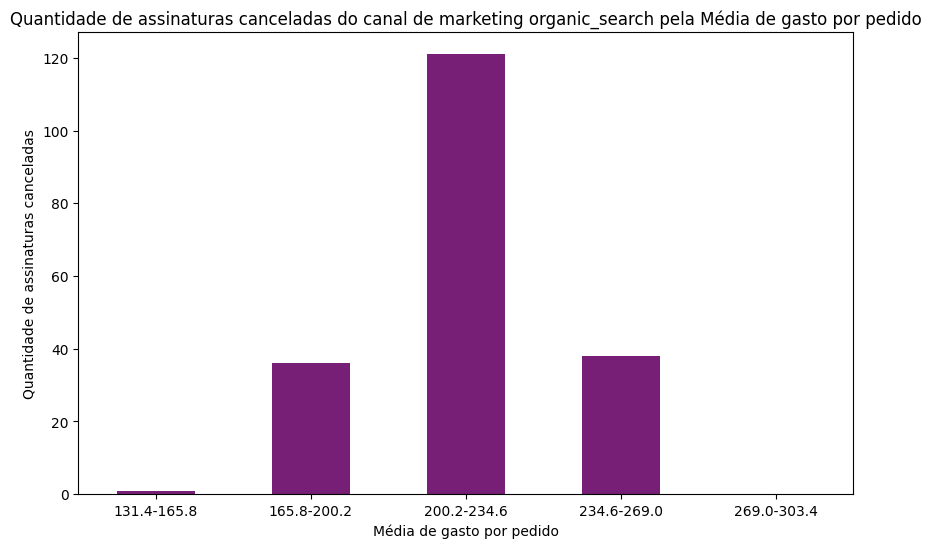

In [47]:
"""Quantidade de assinaturas canceladas pela Média de gasto por pedido,considerando
apenas o canal de marketing organic_search

Descrição:
  Criar gráfico que apresente a distribuição da quantidade de assinaturas
  canceladas pela Média de gasto por pedido, considerando apenas o canal de marketing
  organic_search.
"""

df_canceled_mkt_t = df[(df['status'] == 'canceled') & (df['marketing_source'] == 'organic_search')]
contagem_canceled_por_intervalo = df_canceled_mkt_t['slots_average_ticket'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
contagem_canceled_por_intervalo.plot(kind='bar', color='#771e76')
plt.xlabel('Média de gasto por pedido')
plt.ylabel('Quantidade de assinaturas canceladas')
plt.title('Quantidade de assinaturas canceladas do canal de marketing organic_search pela Média de gasto por pedido')
plt.xticks(rotation=0)

plt.show()

<ipython-input-48-137c692d56ac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceled['diff_last_purchase_deleted'] = (df_canceled['deleted_at']- df_canceled['last_date_purchase']).dt.days//30


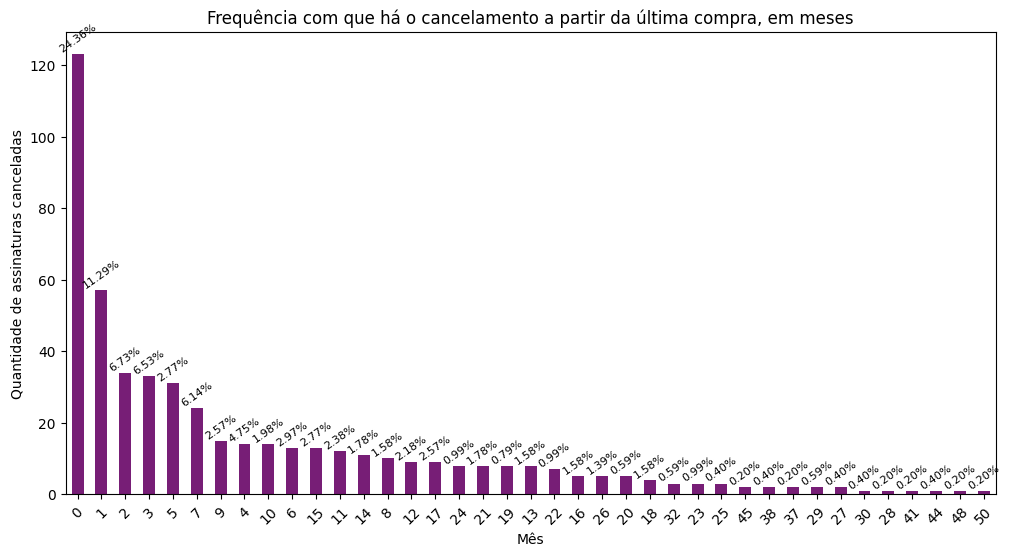

In [48]:
"""Frequência com que há o cancelamento a partir da última compra, em meses

Descrição:
  Criar gráfico que apresente a frequência com que há o cancelamento a partir
  da última compra, em meses.

Objetivo:
  Responder a 'quanto tempo após a ultima compra foi feito o cancelamento da assinatura?'
"""

df_canceled['diff_last_purchase_deleted'] = (df_canceled['deleted_at']- df_canceled['last_date_purchase']).dt.days//30
count_per_diff = df_canceled.groupby('diff_last_purchase_deleted')['id'].nunique()


all_canceled = count_per_diff.sum()
perc = (count_per_diff / all_canceled) * 100

count_per_diff = count_per_diff.sort_values(ascending=False)
perc = perc.sort_index()

plt.figure(figsize=(12, 6))
ax = count_per_diff.plot(kind='bar', color='#771e76')

for i, v in enumerate(perc):
    ax.text(i, count_per_diff.iloc[i], f'{v:.2f}%', ha='center', va='bottom', fontsize=8, rotation=35)

plt.ylabel('Quantidade de assinaturas canceladas')
plt.xlabel('Mês')
plt.title('Frequência com que há o cancelamento a partir da última compra, em meses')
plt.xticks(rotation=45)

plt.show()